In [16]:
import pandas as pd
import numpy as np
from glob import glob
import cv2, os
import matplotlib.pylab as plt
from mpl_toolkits import mplot3d

In [110]:
fitzpatrick_scale_rgb = {
    'type01': [240, 209, 181], 
    'type02': [223, 181, 147], 
    'type03': [202, 159, 129],
    'type04': [175, 121, 84], 
    'type05': [156, 97, 54], 
    'type06': [58, 35, 32]
}

test_img = [[[0.8025615, 0.61692286, 0.484919]]]
test_img_255 = [x*255 for x in test_img[0][0]]
print(fitzpatrick_scale_rgb['type01'], test_img_255)

def get_fitzpatrick_rgb_type(img):
    distance = {}
    img = [x*255 for x in img]
    for k,v in fitzpatrick_scale_rgb.items():
        distance[k] = abs(np.mean(np.subtract(fitzpatrick_scale_rgb[k], img)))
    return [i for i in distance if distance[i]==min(distance.values())][0] #, min(distance.values())
    # return distance, min(distance.values())
    # return img, distance




[240, 209, 181] [204.6531825, 157.3153293, 123.65434499999999]


In [3]:
# path = 'G:/Shared drives/TriplegangersFemaleData/neutrals/Age1?-*/processed/models/*_noHaircap.png'
path = 'G:/Shared drives/TriplegangersFemaleData/neutrals/*/processed/models/*_noHaircap.png'

images = pd.Series([x.replace(os.sep, '/') for x in glob(path)], name='path')
name_splits = [x.split('/')[-4].split('-') for x in images]
age = pd.Series([x[0].lstrip('Age') for x in name_splits], name='age')
name = pd.Series([x[1] for x in name_splits], name='name')

df = pd.concat([name, age, images],
    axis=1)


In [4]:
imgs_reshape = [cv2.resize(plt.imread(x), (50, 50)) for x in df['path']]
shape = pd.Series([x.shape for x in imgs_reshape], name='img_shape')
shape[0]

(50, 50, 3)

In [5]:
imgs_blur = [cv2.GaussianBlur(x, (101, 101), 10) for x in imgs_reshape]
fig, ax = plt.subplots(1, len(imgs_blur), figsize=(20,10))
for i in range(len(imgs_blur)):
    ax[i].imshow(imgs_blur[i])
    ax[i].axis('off')

In [6]:
imgs_reshape_32px = [cv2.resize(x, (32, 32)) for x in imgs_blur]
imgs_blur = [cv2.GaussianBlur(x, (65, 65), 10) for x in imgs_reshape_32px]
imgs_reshape_1px = [cv2.resize(x, (1, 1))[0][0] for x in imgs_blur]
fig, ax = plt.subplots(1, len(imgs_blur), figsize=(20,5))
for i in range(len(imgs_blur)):
    ax[i].imshow(imgs_blur[i])
    ax[i].axis('off')

In [10]:
df['img_reshape_1px']=imgs_reshape_1px
df['img_rgb255_1px']=[x*255 for x in imgs_reshape_1px]
df


,name,age,path,img_reshape_1px,fitzpatrick_type,img_rgb255_1px
0,AmyKamano,18,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.8025615, 0.61692286, 0.484919]",type03,"[204.65318, 157.31532, 123.65435]"
1,JaneReynolds,20,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.73117244, 0.57112527, 0.4871186]",type03,"[186.44897, 145.63695, 124.21524]"
2,AmberChun,18,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.74067265, 0.55528575, 0.43762404]",type03,"[188.87152, 141.59787, 111.59413]"
3,CamilaHino,18,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.7450169, 0.56556165, 0.45853415]",type03,"[189.97931, 144.21822, 116.92621]"
4,EmilyFields,18,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.7842063, 0.63261265, 0.5369396]",type03,"[199.9726, 161.31622, 136.9196]"
...,...,...,...,...,...,...
262,SherylTseng,70,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.70294696, 0.5198522, 0.41492987]",type04,"[179.25148, 132.56232, 105.80711]"
263,EmmaOrasi,70,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.71496606, 0.54008585, 0.44365507]",type04,"[182.31635, 137.7219, 113.13204]"
264,PhyllisParker,69,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.70086884, 0.52549636, 0.43098956]",type04,"[178.72156, 134.00157, 109.902336]"
265,BerthaHoran,76,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.72605443, 0.5506408, 0.43580657]",type03,"[185.14388, 140.4134, 111.13068]"


In [111]:

types = [get_fitzpatrick_rgb_type(x) for x in df['img_reshape_1px']]
df['fitzpatrick_type'] = types
df

,name,age,path,img_reshape_1px,fitzpatrick_type,img_rgb255_1px
0,AmyKamano,18,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.8025615, 0.61692286, 0.484919]",type03,"[204.65318, 157.31532, 123.65435]"
1,JaneReynolds,20,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.73117244, 0.57112527, 0.4871186]",type03,"[186.44897, 145.63695, 124.21524]"
2,AmberChun,18,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.74067265, 0.55528575, 0.43762404]",type03,"[188.87152, 141.59787, 111.59413]"
3,CamilaHino,18,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.7450169, 0.56556165, 0.45853415]",type03,"[189.97931, 144.21822, 116.92621]"
4,EmilyFields,18,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.7842063, 0.63261265, 0.5369396]",type03,"[199.9726, 161.31622, 136.9196]"
...,...,...,...,...,...,...
262,SherylTseng,70,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.70294696, 0.5198522, 0.41492987]",type04,"[179.25148, 132.56232, 105.80711]"
263,EmmaOrasi,70,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.71496606, 0.54008585, 0.44365507]",type04,"[182.31635, 137.7219, 113.13204]"
264,PhyllisParker,69,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.70086884, 0.52549636, 0.43098956]",type04,"[178.72156, 134.00157, 109.902336]"
265,BerthaHoran,76,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.72605443, 0.5506408, 0.43580657]",type03,"[185.14388, 140.4134, 111.13068]"


In [118]:
df5 = df[df['fitzpatrick_type'].isin(['type05'])]
df5

,name,age,path,img_reshape_1px,fitzpatrick_type,img_rgb255_1px
28,JulianaBush,19,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.48764297, 0.34989423, 0.29837608]",type05,"[124.34896, 89.22303, 76.0859]"
41,SaraLowery,19,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.5369725, 0.38642383, 0.3245679]",type05,"[136.928, 98.53808, 82.76482]"
46,WandaEdwards,19,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.4412241, 0.32280898, 0.28278583]",type05,"[112.512146, 82.31629, 72.11039]"
84,CamilaMazurek,22,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.39933804, 0.29348361, 0.25915387]",type05,"[101.8312, 74.838326, 66.084236]"
117,LorenaBuchanan,23,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.41879812, 0.30224615, 0.26300547]",type05,"[106.79352, 77.07277, 67.06639]"
128,LauraScavo,24,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.39216393, 0.2883953, 0.25690797]",type05,"[100.0018, 73.540794, 65.511536]"
131,FabianaClark,24,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.56709313, 0.4051888, 0.31014082]",type05,"[144.60875, 103.32314, 79.08591]"
143,MelodyWebb,24,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.515829, 0.37507084, 0.30939206]",type05,"[131.5364, 95.64307, 78.89497]"
149,GloriaJuan,25,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.47431755, 0.341045, 0.29420644]",type05,"[120.95097, 86.96648, 75.022644]"
154,StephanieErime,25,G:/Shared drives/TriplegangersFemaleData/neutr...,"[0.45482105, 0.32247525, 0.27280778]",type05,"[115.97937, 82.23119, 69.56599]"


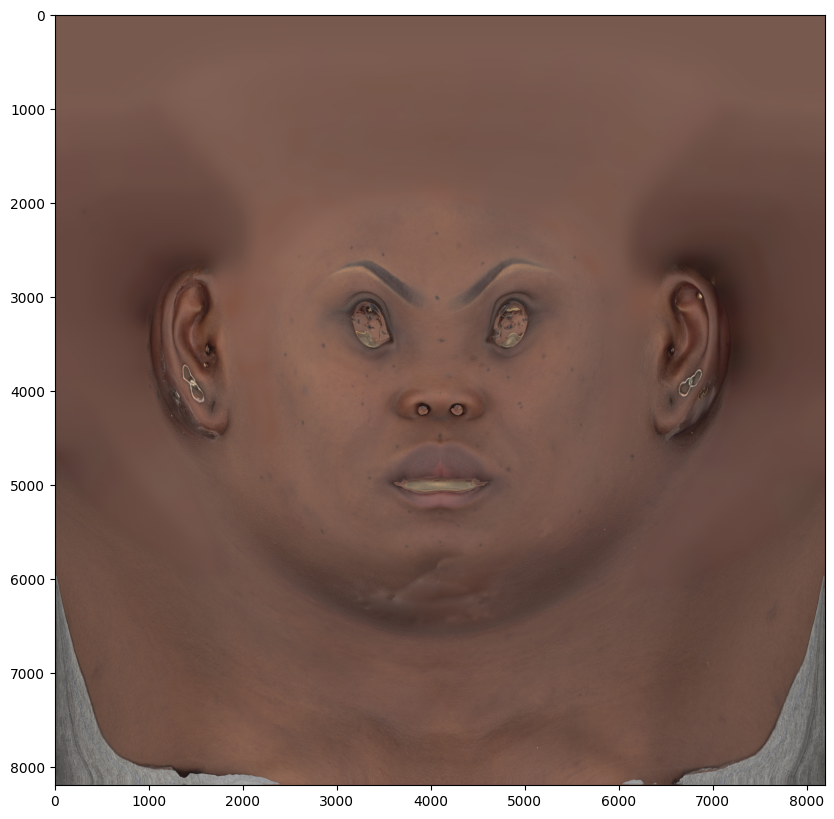

In [131]:
# df['name'][0]
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(plt.imread(df['path'][46]))

<AxesSubplot: xlabel='fitzpatrick_type'>

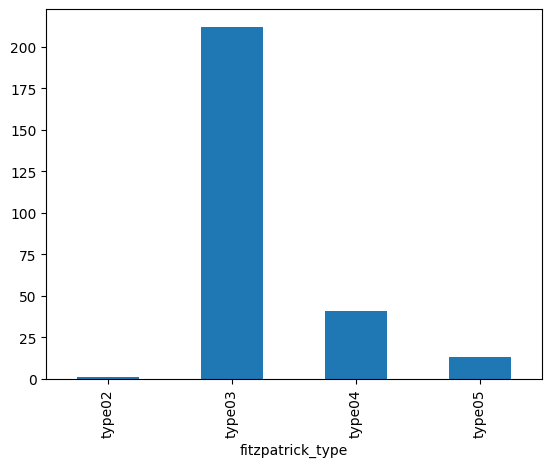

In [9]:

df.groupby(['fitzpatrick_type'])['fitzpatrick_type'].count().plot.bar()

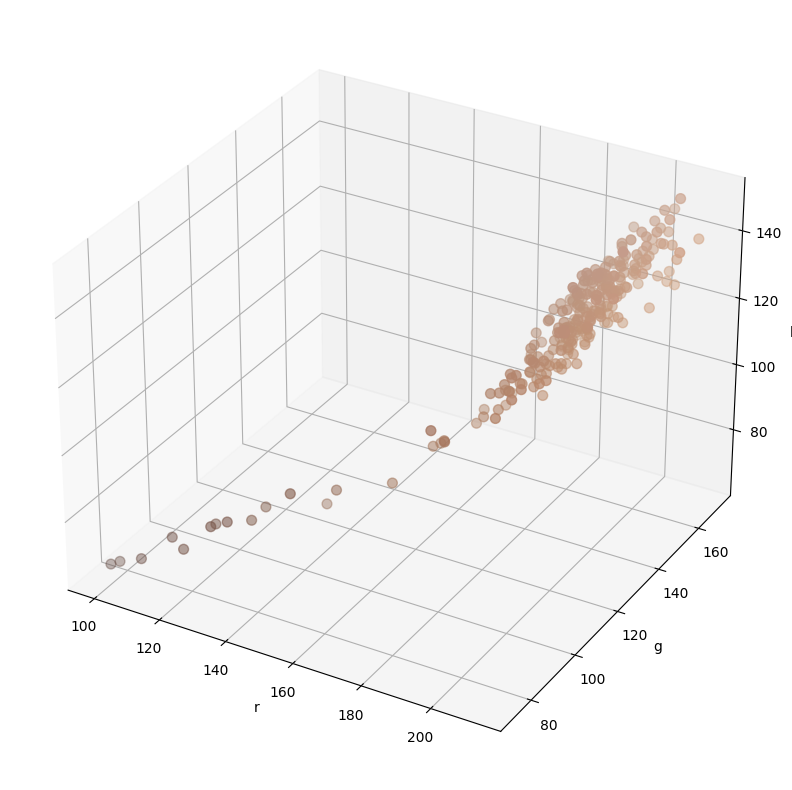

In [101]:
# np.array(df['img_rgb255_1px'][0])[0]


df2 = pd.DataFrame(df['img_rgb255_1px'].tolist(), columns=['r', 'g', 'b'])
# df2[['r', 'g', 'b']]=pd.DataFrame(df2[''])
df2['color']=df['img_rgb255_1px']
# df2

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# ax.scatter3D(df2.r, df2.g, df2.b, c=df2.r+df2.g+df2.b)
ax.scatter3D(df2.r, df2.g, df2.b, c=df2.color/255, s=50)
# ax.set_xticks(range(0, 255, 25))
# ax.set_yticks(range(0, 255, 25))
# ax.set_zticks(range(0, 255, 25))
ax.set_xlabel('r')
ax.set_ylabel('g')
ax.set_zlabel('b')
plt.show()